In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

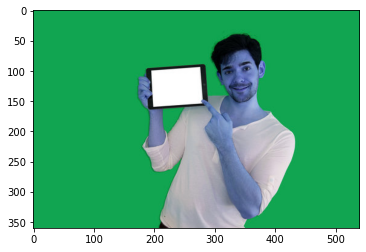

In [45]:
color_image  = cv2.imread("test.jpg")
plt.imshow(color_image)

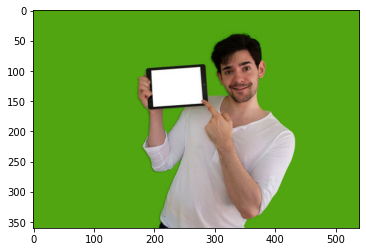

In [54]:
color_image = cv2.cvtColor(color_image,cv2.COLOR_BGR2RGB)
color_image.shape
plt.imshow(color_image)

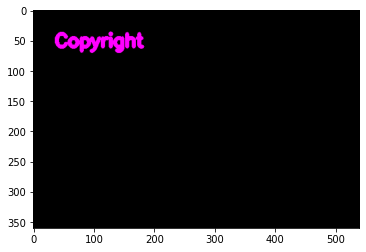

In [48]:
blank_img = np.zeros(shape=(color_image.shape[0],color_image.shape[1],3),dtype=np.uint8)
font =cv2.FONT_HERSHEY_SIMPLEX
blank_img = cv2.putText(blank_img,
                        text = "Copyright",
                        org=(color_image.shape[1]//15,color_image.shape[0]//6),
                        fontFace=font,
                        fontScale=1,color=(255,0,255),
                        thickness=5,
                        lineType=cv2.LINE_4)
plt.imshow(blank_img)

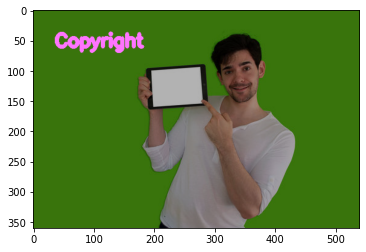

In [30]:
blended_img = cv2.addWeighted(src1=color_image,alpha=0.7,src2=blank_img,beta=1,gamma=0)
plt.imshow(blended_img)

To add a Image based watermark

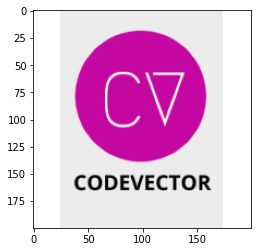

In [49]:
watermark = cv2.imread("cv_labs.png",-1)
#watermark = cv2.cvtColor(watermark,cv2.COLOR_RGB2RGBA)
plt.imshow(watermark)

In [56]:
wh, ww, wc = watermark.shape
h, w, c = color_image.shape

#Creating a blank channel of same dimensions in the color image
new_img = np.dstack([color_image,np.full((h,w),255)])
#new_img = cv2.cvtColor(new_img,cv2.COLOR_BGRA2RGBA)
#plt.imshow(new_img)
new_img.shape

(360, 540, 4)

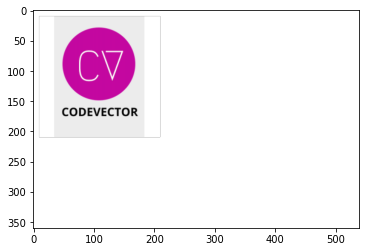

In [61]:
x1, y1 = 10,10
x2, y2 = x1 + ww,y1 + wh
overlay = np.zeros_like(new_img)
overlay[y1:y2,x1:x2] = watermark

plt.imshow(overlay)

In [66]:
combined = new_img.copy()
combined = cv2.addWeighted(overlay,0.2,combined,1.0,0)
final = cv2.imwrite("/home/abh300/New_Virtual/Watermark_to_image/Image_with_watermark.jpg",       combined)